## Cat and Dog Classifier
This following code shows all the building steps for building Convolutional Neural Network to classify between two iamges as cat or dog.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from matplotlib.image import imread

##### Setting up the variables to store the address of the dataset.


Following cell displays a list of names for the dog images in the training set.

In [19]:
dataset_link = '.\cat_dog\dataset'
training_set = dataset_link + '\\training_set'
os.listdir(training_set+'\dogs')

['dog.1.jpg',
 'dog.10.jpg',
 'dog.100.jpg',
 'dog.1000.jpg',
 'dog.1001.jpg',
 'dog.1002.jpg',
 'dog.1003.jpg',
 'dog.1004.jpg',
 'dog.1005.jpg',
 'dog.1006.jpg',
 'dog.1007.jpg',
 'dog.1008.jpg',
 'dog.1009.jpg',
 'dog.101.jpg',
 'dog.1010.jpg',
 'dog.1011.jpg',
 'dog.1012.jpg',
 'dog.1013.jpg',
 'dog.1014.jpg',
 'dog.1015.jpg',
 'dog.1016.jpg',
 'dog.1017.jpg',
 'dog.1018.jpg',
 'dog.1019.jpg',
 'dog.102.jpg',
 'dog.1020.jpg',
 'dog.1021.jpg',
 'dog.1022.jpg',
 'dog.1023.jpg',
 'dog.1024.jpg',
 'dog.1025.jpg',
 'dog.1026.jpg',
 'dog.1027.jpg',
 'dog.1028.jpg',
 'dog.1029.jpg',
 'dog.103.jpg',
 'dog.1030.jpg',
 'dog.1031.jpg',
 'dog.1032.jpg',
 'dog.1033.jpg',
 'dog.1034.jpg',
 'dog.1035.jpg',
 'dog.1036.jpg',
 'dog.1037.jpg',
 'dog.1038.jpg',
 'dog.1039.jpg',
 'dog.104.jpg',
 'dog.1040.jpg',
 'dog.1041.jpg',
 'dog.1042.jpg',
 'dog.1043.jpg',
 'dog.1044.jpg',
 'dog.1045.jpg',
 'dog.1046.jpg',
 'dog.1047.jpg',
 'dog.1048.jpg',
 'dog.1049.jpg',
 'dog.105.jpg',
 'dog.1050.jpg',
 'dog.10

Displaying a sample image from the training set.

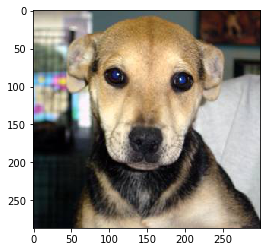

In [20]:
sample_train_dog = training_set+'\dogs\\'+'\dog.4.jpg'
plt.imshow(imread(sample_train_dog))

The actual address variables that will be used in the model.

In [21]:
training_path = dataset_link + '\\training_set'
test_path     = dataset_link + '\\test_set'

All the images have a common shape as (255,255,3). Computations on this size can might require large training time. Reducing the size to (64,64,3) will be helpful. This will lead to loss of some data but that can be ignored. All depends on the hardware and training time.

In [22]:
image_width = 64
image_height = 64
image_color = 3
image_shape = (image_width,image_height,image_color)

In [23]:
batch_size = 16

Data Agumentation: An effiicent way to inc

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from numpy import expand_dims

Displaying some sample of augmented images of the sample dog image from the dataset.

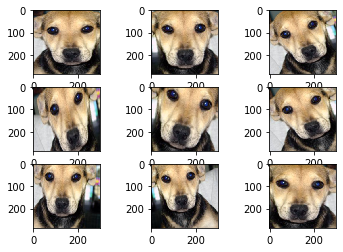

In [26]:
sample_img_gen = ImageDataGenerator(rotation_range=20,
                                  height_shift_range= 0.06,
                                   width_shift_range = 0.06,
                                   shear_range=0.1,
                                   horizontal_flip=True,
                                   zoom_range=[0.5,0.8])

sample_image = load_img(sample_train_dog)
sample_image_array = img_to_array(sample_image)
test_image = expand_dims(sample_image_array,0)
image_aug = sample_img_gen.flow(test_image,batch_size=1)
for i in range(9):
    plt.subplot(330+1+i)
    batch = image_aug.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

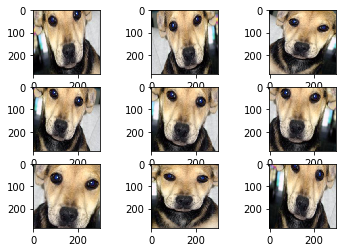

In [27]:
image_aug = sample_img_gen.flow(test_image,batch_size=1)
for i in range(9):
    plt.subplot(330+1+i)
    batch = image_aug.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

###### Creating an instance for the Image Data Geneator for Data augmentation of the training set and test set.

Note: On training set we apply various augmentation techniques but on test set we only apply the rescale technique.
Moreover on the above augmented images no rescaling is performed.

Image Data Generator also displays the no.of classes detected by the instance.

In [28]:
train_img_gen = ImageDataGenerator(rotation_range=20,
                                  rescale=1./255,
                                  height_shift_range=0.06,
                                  width_shift_range = 0.06,
                                  shear_range=0.1,
                                  horizontal_flip = True,
                                  zoom_range=[0.5,0.8])

train_generated_data = train_img_gen.flow_from_directory(training_path,
                                                        target_size = image_shape[:2],
                                                        color_mode = 'rgb',
                                                        batch_size = batch_size,
                                                        class_mode='binary')
print(train_generated_data.class_indices)

Found 8000 images belonging to 2 classes.
{'cats': 0, 'dogs': 1}


In [29]:
test_img_gen = ImageDataGenerator(rescale=1./255)

test_generated_data = test_img_gen.flow_from_directory(test_path,
                                                  target_size = image_shape[:2],
                                                  color_mode = 'rgb',
                                                  batch_size = batch_size,
                                                  class_mode='binary')

print(test_generated_data.class_indices)

Found 2000 images belonging to 2 classes.
{'cats': 0, 'dogs': 1}


In [30]:
lenght_train = 8000
lenght_test = 2000 

#### Creating the CNN model.

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
model = Sequential()
model.add(Conv2D(filters=64,kernel_size=(2,2),activation=LeakyReLU(alpha=0.1),padding='same',input_shape=image_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=72,kernel_size=(2,2),activation=LeakyReLU(alpha=0.1),padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=120,kernel_size=(2,2),activation=LeakyReLU(alpha=0.1),padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128,activation=LeakyReLU(alpha=0.1)))
model.add(Dropout(0.25))
model.add(Dense(units=64,activation=LeakyReLU(alpha=0.1)))
model.add(Dropout(0.25))
model.add(Dense(2,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 64, 64, 64)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 72)        18504     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 72)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 120)       34680     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 120)         0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 120)        

Creating an early stopping instance inorder to prevent over-fitting.

In [34]:
early_stop = EarlyStopping(monitor='val_loss',patience=4)

Fitting the training data (train_generated_data) to the model and testing it on the test set (test_generated_data).

In [35]:
model.fit_generator(train_generated_data,validation_data=test_generated_data,
                    steps_per_epoch = lenght_train//batch_size,
                    validation_steps=lenght_test//batch_size,
                    epochs=37,callbacks=[early_stop])

Epoch 1/37
500/500 [==============================] - 62s 125ms/step - loss: 0.6907 - accuracy: 0.5282 - val_loss: 0.6715 - val_accuracy: 0.6105
Epoch 2/37
500/500 [==============================] - 56s 112ms/step - loss: 0.6534 - accuracy: 0.6144 - val_loss: 0.6293 - val_accuracy: 0.6530
Epoch 3/37
500/500 [==============================] - 61s 121ms/step - loss: 0.6092 - accuracy: 0.6681 - val_loss: 0.7534 - val_accuracy: 0.5705
Epoch 4/37
500/500 [==============================] - 61s 121ms/step - loss: 0.5873 - accuracy: 0.6945 - val_loss: 0.6154 - val_accuracy: 0.6820
Epoch 5/37
500/500 [==============================] - 60s 119ms/step - loss: 0.5570 - accuracy: 0.7126 - val_loss: 0.6848 - val_accuracy: 0.6660
Epoch 6/37
500/500 [==============================] - 60s 121ms/step - loss: 0.5453 - accuracy: 0.7260 - val_loss: 0.6206 - val_accuracy: 0.6550
Epoch 7/37
500/500 [==============================] - 60s 120ms/step - loss: 0.5391 - accuracy: 0.7256 - val_loss: 0.5508 - val_ac

Storing the results of the traning and plotting the graphs of the losses and accuracies.

In [36]:
results = pd.DataFrame(model.history.history)

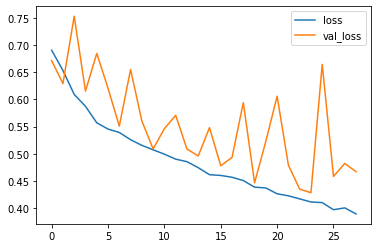

In [37]:
results[['loss','val_loss']].plot()

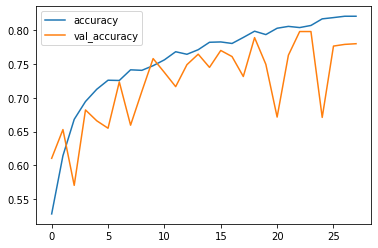

In [39]:
results[['accuracy','val_accuracy']].plot()

The graphs are not symmetrical. The quality of the graphs can be improved by making a better and more efficient model and also get more training data.

##### Saving the trained model for future use.

In [40]:
model.save("Cat_Dog_Classifier_trained_model.h5")

Following is a image of a dog with a resolution of around (720 X 900). Here we use the model to make a prediction on this image i.e. let the model undeerstand and classify the image as a dog or a cat.

Note: We know that the image is of a dog but the model doesn't. Let's check the smartness on the model.

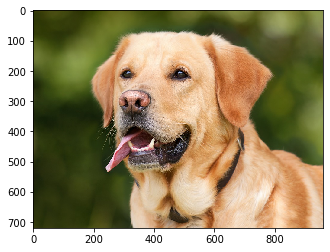

In [41]:
testing_image_1 = '.\\cat_dog\\dataset\\single_prediction\\cat_or_dog_1.jpg'
plt.imshow(imread(testing_image_1))

Using the Keras image preporcessing functions to transform the image so that it can be fed to the model without any problem.
The steps include - reducing the resolution of the image then converting the image into an array and finally expanding the dimenions on the image inorder to include the batch size. Even though there is only one image we need to specific the batch_size.

##### Make a prediction
Note: '0' corresponds to cat class and '1' corresponds to the dog class. To verfiy this please check the ImageDataGenerator cell above.

In [42]:
test_1 = load_img(testing_image_1,target_size=(64,64))
test_1 = img_to_array(test_1)  #adding the color dimension
test_1 = np.expand_dims(test_1,axis=0)   #adding the new dimension which corresponds to the batch
predict = model.predict_classes(test_1)
print(predict)
if predict[0] == 1:
    pred_1 = 'dog'
else:
    pred_1 = 'cat'
print("The given image is of: ",pred_1)

[1]
The given image is of:  dog


Yeahhhhh !.. The model predicted the image to be a dog i.e. the correct answer.

Now will we follow the same process as we did above but now with a different image, this time it is a cat.
Remember we know that the image is of a cat but the model doesn't know.

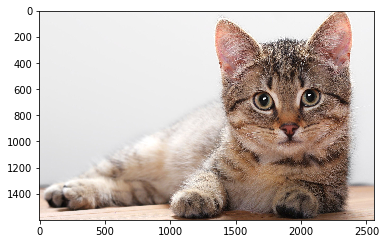

In [43]:
testing_image_2 = '.\\cat_dog\\dataset\\single_prediction\\cat_or_dog_2.jpg'
plt.imshow(imread(testing_image_2))

In [44]:
test_2 = load_img(testing_image_2,target_size=(64,64))
test_2 = img_to_array(test_2)  #adding the color dimension
test_2 = np.expand_dims(test_2,axis=0)   #adding the new dimension which corresponds to the batch
predict = model.predict_classes(test_2)
print(predict)
if predict[0] == 1:
    pred_2 = 'dog'
else:
    pred_2 = 'cat'
print("The given image is of: ",pred_2)

[0]
The given image is of:  cat


And again the model says that the image is of a cat which the correct answer. 

So we can conclude that the model works pretty fine on different images cats and dogs which it has never seen before.

Note: The accuracy of the model is around 80% so there migth be cases where it would give predictions. This can be resolved by training a more robust and efficient model with more training data.